In [1]:
# Comparing OSPEX fits to the RHESSI microflares using different versions
# of the OSPEX CHIANTI dbase files, fitting with f_vth + bpow
# 
# Using 
# v5.2: 
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v52.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v52.sav
# v7.1 (sunkit-spex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v71.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v71.sav
# v9.0.1 (ospex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_01_250_unity_v901.geny
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_07_12_unity_v901_t41.geny
# v10.1 (newly generated by me using approx v9 setup for T and \lambda)
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_cont_1_250_unity_v101_t41.geny
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_lines_1_12_unity_v101_t41.geny
# 
# 6-Feb-2024    IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14

In [3]:
# Load in the results files
r05=read_genx('wee_2024_vth52_bpow.genx')
r07=read_genx('wee_2024_vth71_bpow.genx')
r09=read_genx('wee_2024_vth90_bpow.genx')
r10=read_genx('wee_2024_vth101_bpow.genx')

In [4]:
# Restructure things to make it easier to work with
tmk05=[r["OSX_P"][1] for r in r05["SAVEGEN0"]]
em05=[r["OSX_P"][0]*1e49 for r in r05["SAVEGEN0"]]

tmk07=[r["OSX_P"][1] for r in r07["SAVEGEN0"]]
em07=[r["OSX_P"][0]*1e49 for r in r07["SAVEGEN0"]]

tmk09=[r["OSX_P"][1] for r in r09["SAVEGEN0"]]
em09=[r["OSX_P"][0]*1e49 for r in r09["SAVEGEN0"]]

tmk10=[r["OSX_P"][1] for r in r10["SAVEGEN0"]]
em10=[r["OSX_P"][0]*1e49 for r in r10["SAVEGEN0"]]

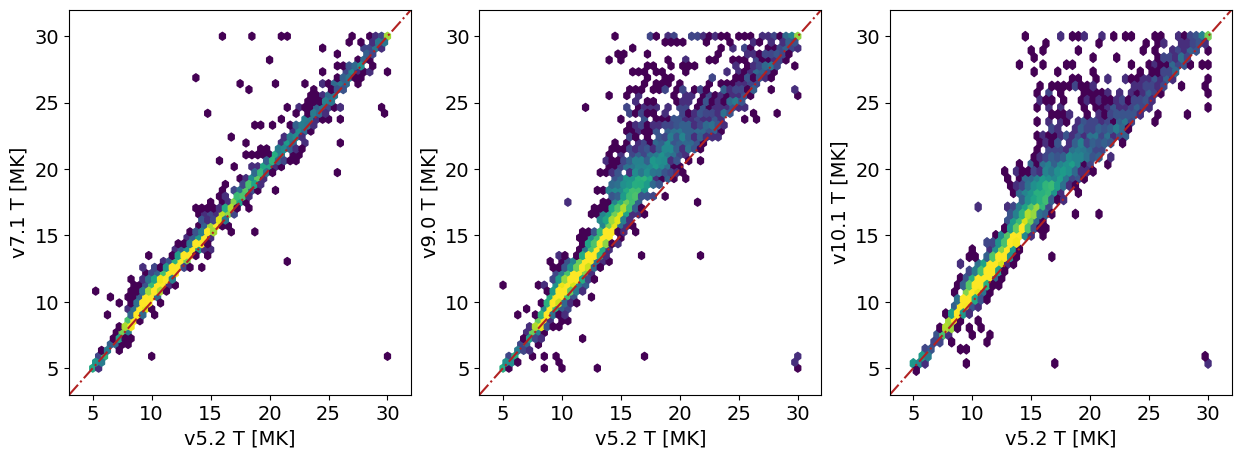

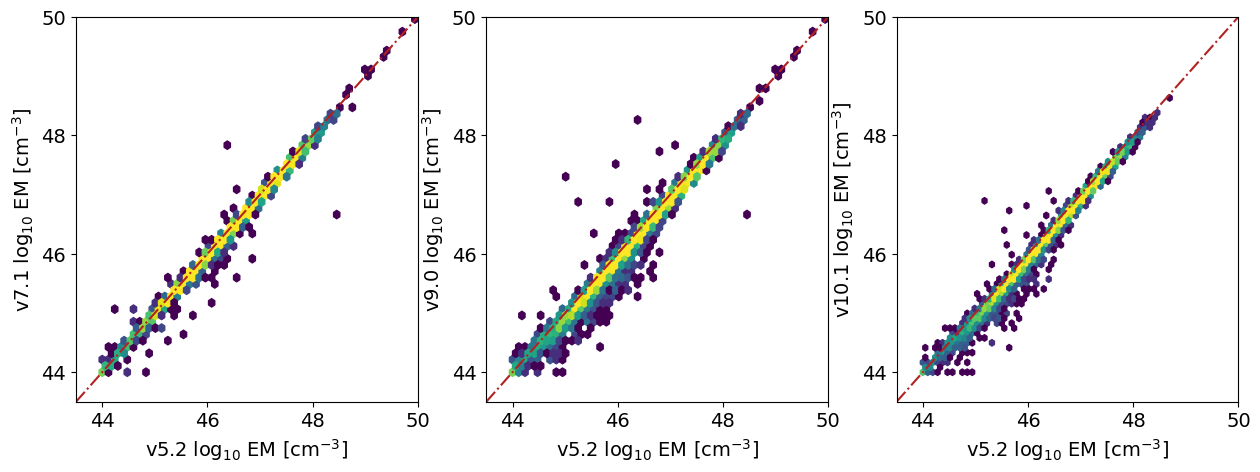

In [5]:
tmkr=[3,32]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(tmk05,tmk07,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 T [MK]')
axs[1].hexbin(tmk05,tmk09,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 T [MK]')
axs[2].hexbin(tmk05,tmk10,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 T [MK]')

for ax in axs:
    ax.set_xlim(tmkr)
    ax.set_ylim(tmkr)
    ax.plot(tmkr,tmkr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_xlabel('v5.2 T [MK]')
plt.show()
# ------------------------------------------------------
emr=[43.5,50]
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(np.log10(em05),np.log10(em07),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 log$_{10}$ EM [cm$^{-3}$]')
axs[1].hexbin(np.log10(em05),np.log10(em09),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 log$_{10}$ EM [cm$^{-3}$]')
axs[2].hexbin(np.log10(em05),np.log10(em10),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 log$_{10}$ EM [cm$^{-3}$]')

for ax in axs:
    ax.set_xlim(emr)
    ax.set_ylim(emr)
    ax.plot(emr,emr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 log$_{10}$ EM [cm$^{-3}$]')
plt.show()

## bpow parameter and non-thermal energy

In this work was fitting the non-thermal emission with a broken powerlaw in photon-space, i.e
\begin{equation}
I(\epsilon)\propto\begin{cases}
    \epsilon^{-\gamma_1}, & \text{if $\epsilon<\epsilon_\mathrm{B}$}\\
    \epsilon^{-\gamma_2}, & \text{if $\epsilon\geq\epsilon_\mathrm{B}$}
  \end{cases} \quad\mathrm{[photon\;s^{-1}\;keV^{-1}\;cm^{-2}]}
\end{equation}

where $\epsilon_\mathrm{B}$ is the break in the powerlaw, and $\gamma_1=1.5$ to represent the flattening at lower energies, and $\gamma_2$ the powerlaw index of interest, which for a thick-target model should be related to the electron distribution powerlaw index $\delta=\gamma_2+1$. Here the issue is that we do not know the low energy cutoff of the electron distribution $E_\mathrm{C}$ and first attempt is just using $E_\mathrm{C}=\epsilon_\mathrm{B}$.

For the non-thermal power calculation need the photon flux [photons $\mathrm{s}^{-1}$ $\mathrm{keV}^{-1}$ $\mathrm{cm}^{-2}$] of the powerlaw with index above the break at 1 keV, which we will call $A$, then
\begin{equation}
P(\geq E_\mathrm{C})=9.5\times10^{24}\gamma_2^2 (\gamma_2-1)\beta\left(\gamma_2-\frac{1}{2},\frac{3}{2}\right)AE_\mathrm{C}^{(1-\gamma_2)}\quad\mathrm{[erg\;s^{-1}]}
\end{equation}

where $\beta(p,q)$ is the Beta function. Note that the $9.5\times10^{24}$ was used in Hannah et al. 2008 and Lin et al. 2001, but Aschwanden 2004 (book, §13.2.2 derivation and Eqn 13.2.31) and subsequently papers like Aschwanden et al. 2019 use $4.3\times10^{24}$ - which is correct? Of course now would just fit with the thick-target model of a powerlaw electron distribution $F(\geq E_\mathrm{C})\propto E^{-\delta}$ via the Holman code.

OSPEX fitted a broken powerlaw with bpow and the normalisation parameter is the photon flux of the powerlaw from below the break at the epivot of 50 keV, i.e. $I_1(50)$. So need to convert that to the photon flux at the break - as there the two powerlaws match, i.e. $I_1(\epsilon_\mathrm{B})=I_2(\epsilon_\mathrm{B})$ - and then use that value to work out the photon flux of the powerlaw index above the break at 1 keV, i.e. $I_2(1)\equiv A$. 

For the powerlaw below the break we assume some scaling constant $K_1$, so $I_1(\epsilon)=K_1\epsilon^{-1.5}$ then for the normalisation value from bpow $I_1(50)$ we get
\begin{equation}
I_1(50)=K_1 50^{-1.5}\quad \Rightarrow\quad K_1=I_1(50)/50^{-1.5}
\end{equation}
Then at the break energy the two power laws match, i.e.
\begin{equation}
I_1(\epsilon_\mathrm{B})=I_2(\epsilon_\mathrm{B})\quad \Rightarrow\quad I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}=K_2 \epsilon_\mathrm{B}^{-\gamma_2}\quad \Rightarrow\quad K_2=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2}
\end{equation} 
Hence $I_2(1)\equiv A$ is going to be
\begin{equation}
I_2(1)=K_2 1^{-\gamma_2}=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2} 1^{-\gamma_2}=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2} \equiv A
\end{equation}

In [6]:
# ph flux of powerlaw below break at 50 keV, I_1(50)
Ip05=[r["OSX_P"][3]*1e35 for r in r05["SAVEGEN0"]]
# neg powerlaw index below the break -> fixed at 1.5
gb05=[r["OSX_P"][4] for r in r05["SAVEGEN0"]]
# broken powerlaw break energy [keV]
eb05=[r["OSX_P"][5] for r in r05["SAVEGEN0"]]
# neg powerlaw index above the break
ga05=[r["OSX_P"][6] for r in r05["SAVEGEN0"]]

In [7]:
# Calculate A

# Then calculate the non-thermal power

In [8]:
#  Once confident of volumes can calculate thermal energy